In [1]:
!wget https://github.com/ErkinovTolibjonn/IrisDataset/blob/main/Iris.csv


--2023-01-24 16:51:16--  https://github.com/ErkinovTolibjonn/IrisDataset/blob/main/Iris.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Iris.csv’

Iris.csv                [ <=>                ] 192.14K  --.-KB/s    in 0.03s   

2023-01-24 16:51:16 (5.69 MB/s) - ‘Iris.csv’ saved [196748]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from torch.utils.data import Dataset,DataLoader,random_split

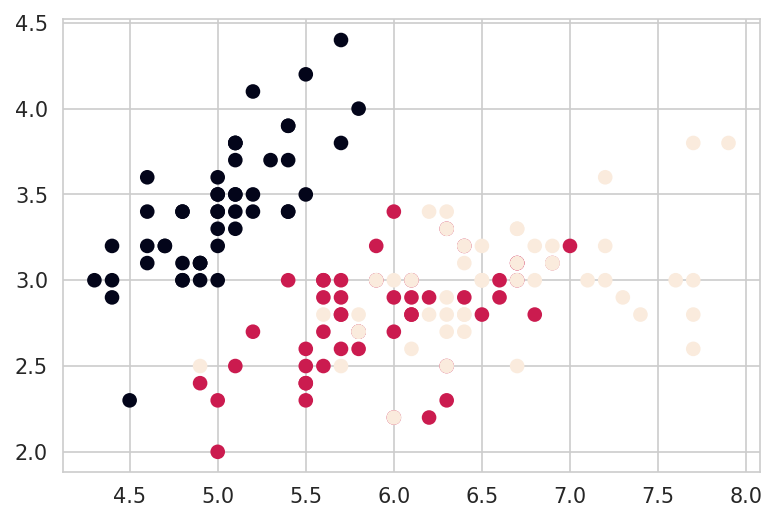

In [ ]:
data = np.genfromtxt('/content/Iris.csv', dtype = 'str',delimiter=',',skip_header=1)
data = data[:,1:]

data_x = data[:,:4]
data_y = data[:,-1]

data_y[data_y == 'Iris-setosa'] = 0
data_y[data_y == 'Iris-versicolor'] = 1
data_y[data_y == 'Iris-virginica'] = 2

x = np.array(data_x.astype(float))
y = np.array(data_y.astype(int))
# print(type(x))

plt.figure(dpi=150)
plt.scatter(x[:,0],x[:,1],c = y)
plt.show()

In [ ]:
class IrisDataset(Dataset):
  classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']
  def __init__(self,fname):
    self.data = np.loadtxt(
        fname=fname,
        dtype=np.float32,
        delimiter=',',
        skiprows=1,
        converters={
            5:lambda x: (self.classes.index(x.decode()))
        }

    )

  def getdata(self):
    return self.data
    
  def __getitem__(self,index):
    x = torch.tensor(self.data[index,1:5],dtype=torch.float32)
    y = torch.tensor(self.data[index,-1],dtype=torch.int64)
    return x,y

  def __len__(self):
    return len(self.data)


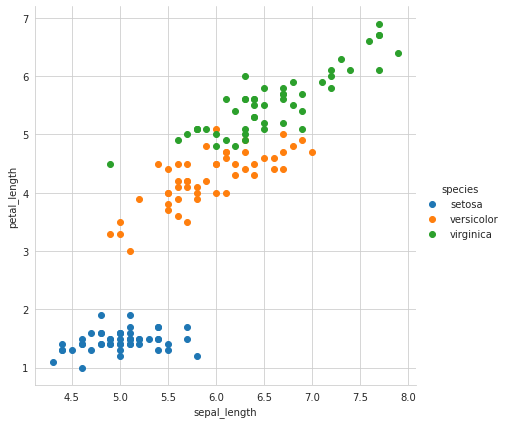

In [ ]:

import seaborn as sns
 
iris = sns.load_dataset('iris')
 
sns.set_style("whitegrid")
 
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

In [ ]:
dataset = IrisDataset('/content/Iris.csv')

In [ ]:
train_data,test_data = random_split(dataset,[100,50])

In [ ]:
len(dataset)

150

In [ ]:
train_loader = DataLoader(dataset = train_data,batch_size=16)
test_loader = DataLoader(dataset = test_data,batch_size = 16)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input, output):
        super().__init__()        
        self.fc1 = torch.nn.Linear(in_features=input, out_features=64)
        self.fc2 = torch.nn.Linear(in_features=64, out_features=64)
        self.fc3 = torch.nn.Linear(in_features=64, out_features=output)
        self.relu = torch.nn.ReLU()
        self.softmax =torch.nn.Softmax(dim=1)
        # Activation function
        

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        out = self.fc3(x)
    
        return out

In [ ]:
model = Net(input = 4,output = 3)

In [ ]:
criterion = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

In [ ]:
num_epochs = 10
total_step = len(train_loader)
loss_list     = []
for epoch in range(num_epochs):
  for i,(train_x,train_y) in enumerate(train_loader):

    # forward pass
    outputs = model(train_x)
    loss = criterion(outputs, train_y)
    loss_list.append(loss)
    # backward
    loss.backward()
    # update
    optimizer.step()

    optimizer.zero_grad()
    if i % 1 == 0:
      print(f'Epoch: [{epoch+1}/{num_epochs}]  step: [{i+1}/{total_step}] loss:{loss.item():.6f}')

Epoch: [1/10]  step: [1/7] loss:1.098404
Epoch: [1/10]  step: [2/7] loss:1.096147
Epoch: [1/10]  step: [3/7] loss:1.069526
Epoch: [1/10]  step: [4/7] loss:1.057194
Epoch: [1/10]  step: [5/7] loss:1.032156
Epoch: [1/10]  step: [6/7] loss:0.997610
Epoch: [1/10]  step: [7/7] loss:1.002502
Epoch: [2/10]  step: [1/7] loss:1.000460
Epoch: [2/10]  step: [2/7] loss:1.014186
Epoch: [2/10]  step: [3/7] loss:0.939407
Epoch: [2/10]  step: [4/7] loss:0.917576
Epoch: [2/10]  step: [5/7] loss:0.923403
Epoch: [2/10]  step: [6/7] loss:0.845965
Epoch: [2/10]  step: [7/7] loss:0.944133
Epoch: [3/10]  step: [1/7] loss:0.967641
Epoch: [3/10]  step: [2/7] loss:1.028369
Epoch: [3/10]  step: [3/7] loss:0.887693
Epoch: [3/10]  step: [4/7] loss:0.812408
Epoch: [3/10]  step: [5/7] loss:0.852370
Epoch: [3/10]  step: [6/7] loss:0.765776
Epoch: [3/10]  step: [7/7] loss:0.859618
Epoch: [4/10]  step: [1/7] loss:0.897608
Epoch: [4/10]  step: [2/7] loss:0.970705
Epoch: [4/10]  step: [3/7] loss:0.828094
Epoch: [4/10]  s

<ipython-input-50-2c64779554c8>:20: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  y = torch.tensor(self.data[index,-1],dtype=torch.int64)
